In [1]:
from skimage import io
from skimage.transform import resize
from skimage import exposure
from skimage import img_as_float

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from glob import glob
import os
import joblib
plt.rcParams.update({'figure.max_open_warning': 0})


# Utils

# Analyse data

In [2]:
train_df = joblib.load("./picklefiles/thold__req_img_mask_df_train")
val_df = joblib.load("./picklefiles/thold__req_img_mask_df_val")

In [3]:
train_df

x  \
1      ../data/coco-person/train/person_images/images...   
2      ../data/coco-person/train/person_images/images...   
4      ../data/coco-person/train/person_images/images...   
5      ../data/coco-person/train/person_images/images...   
6      ../data/coco-person/train/person_images/images...   
...                                                  ...   
64109  ../data/coco-person/train/person_images/images...   
64110  ../data/coco-person/train/person_images/images...   
64111  ../data/coco-person/train/person_images/images...   
64112  ../data/coco-person/train/person_images/images...   
64114  ../data/coco-person/train/person_images/images...   

                                                       y  
1      ../data/coco-person/train/person_masks/masks/1...  
2      ../data/coco-person/train/person_masks/masks/1...  
4      ../data/coco-person/train/person_masks/masks/1...  
5      ../data/coco-person/train/person_masks/masks/1...  
6      ../data/coco-person/train/person_masks/masks/1...  
...                                                  ...  
64109  ../data/coco-person/train/person_masks/masks/9...  
64110  ../data/coco-person/train/person_masks/masks/9...  
64111  ../data/coco-person/train/person_masks/masks/9...  
64112  ../data/coco-person/train/person_masks/masks/9...  
64114  ../data/coco-person/train/person_masks/masks/9...  

[50630 rows x 2 columns]

In [4]:
train_df

x  \
1      ../data/coco-person/train/person_images/images...   
2      ../data/coco-person/train/person_images/images...   
4      ../data/coco-person/train/person_images/images...   
5      ../data/coco-person/train/person_images/images...   
6      ../data/coco-person/train/person_images/images...   
...                                                  ...   
64109  ../data/coco-person/train/person_images/images...   
64110  ../data/coco-person/train/person_images/images...   
64111  ../data/coco-person/train/person_images/images...   
64112  ../data/coco-person/train/person_images/images...   
64114  ../data/coco-person/train/person_images/images...   

                                                       y  
1      ../data/coco-person/train/person_masks/masks/1...  
2      ../data/coco-person/train/person_masks/masks/1...  
4      ../data/coco-person/train/person_masks/masks/1...  
5      ../data/coco-person/train/person_masks/masks/1...  
6      ../data/coco-person/train/person_masks/masks/1...  
...                                                  ...  
64109  ../data/coco-person/train/person_masks/masks/9...  
64110  ../data/coco-person/train/person_masks/masks/9...  
64111  ../data/coco-person/train/person_masks/masks/9...  
64112  ../data/coco-person/train/person_masks/masks/9...  
64114  ../data/coco-person/train/person_masks/masks/9...  

[50630 rows x 2 columns]

In [5]:
i,m = train_df.values[1]

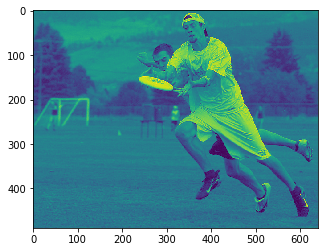

In [6]:
temp_img = io.imread(i,as_gray=True)
plt.imshow(np.clip(temp_img,0,1))

(array([  3792.,  17170.,  37649.,  76272., 120149.,  31243.,   8886.,
          8363.,   7666.,   1770.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

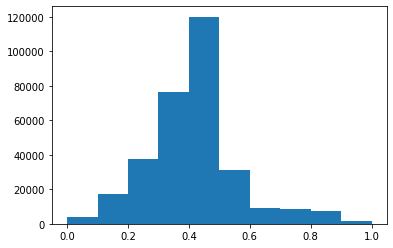

In [7]:
plt.hist(temp_img.flatten())

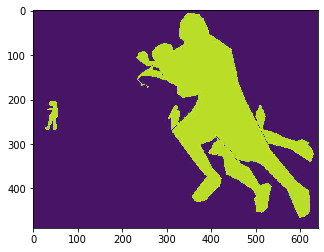

In [8]:
temp_msk = io.imread(m,as_gray=True)
plt.imshow(np.clip(temp_msk,0,1))

(array([2.43293e+05, 1.84600e+03, 2.40000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.24000e+02, 5.62220e+04, 1.13510e+04]),
 array([0.03166667, 0.12471122, 0.21775576, 0.31080031, 0.40384486,
        0.49688941, 0.58993396, 0.68297851, 0.77602306, 0.86906761,
        0.96211216]),
 <a list of 10 Patch objects>)

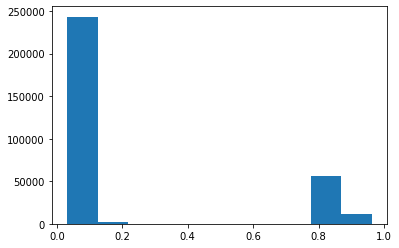

In [9]:
plt.hist(np.clip(temp_msk,0,1).flatten())

In [10]:
# 104337

<Figure size 432x288 with 0 Axes>

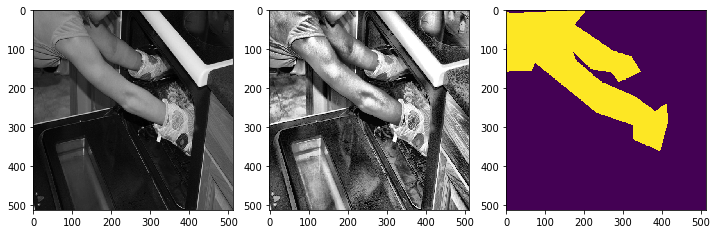

<Figure size 432x288 with 0 Axes>

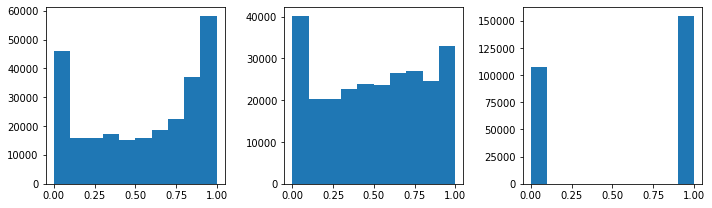

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

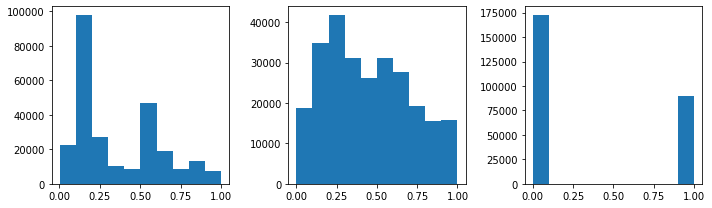

<Figure size 432x288 with 0 Axes>

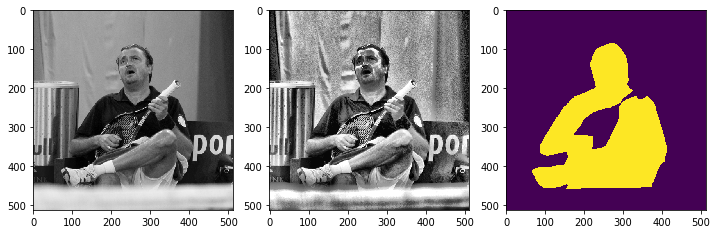

<Figure size 432x288 with 0 Axes>

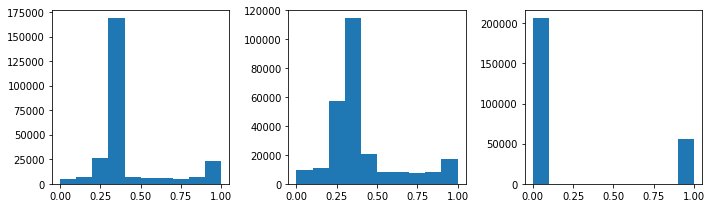

<Figure size 432x288 with 0 Axes>

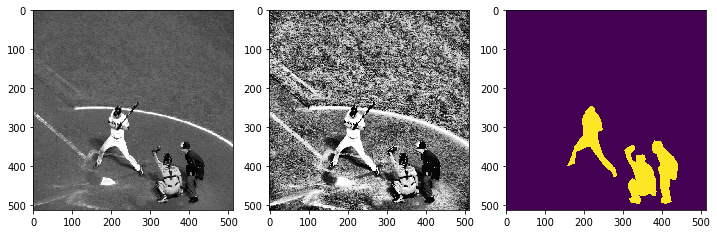

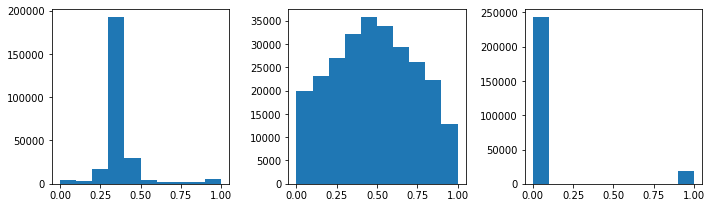

<Figure size 432x288 with 0 Axes>

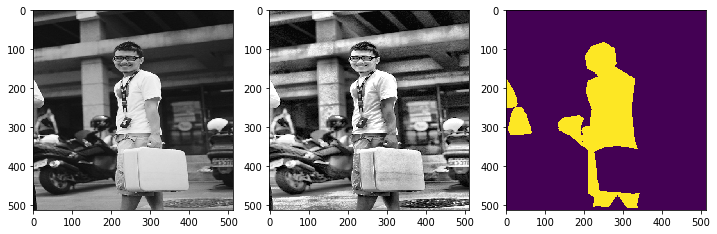

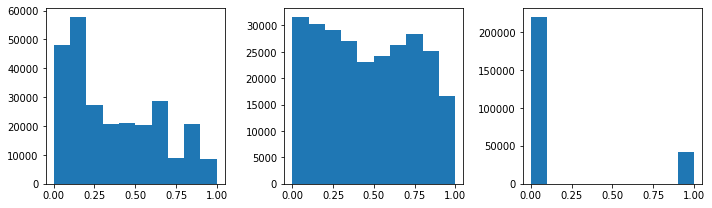

<Figure size 432x288 with 0 Axes>

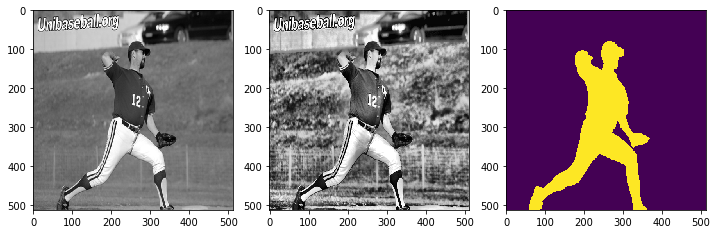

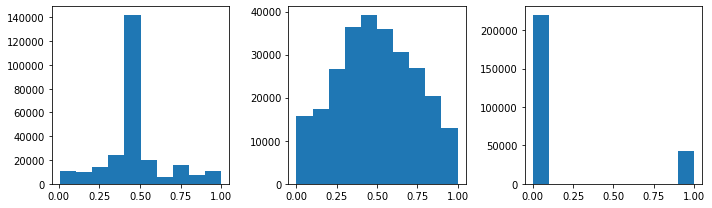

In [16]:
newshape = (512,512)
for x,i in enumerate(train_df[100:120].values):
    # print(i[0])
    img = io.imread(i[0], as_gray=True)
    msk = io.imread(i[1], as_gray=True)
    
    img = resize(img, newshape)
    msk = resize(msk, newshape)
    
    img = np.clip(img,0,1)
    msk = np.clip(msk,0,1)
    
    
    
    # contrast stretching and adaptive equalizing histogram
    p2, p98 = np.percentile(img, (2, 98))
    img_c = exposure.rescale_intensity(img, in_range=(p2,p98))
    img_ = exposure.equalize_adapthist(img_c, clip_limit=0.03)
    
    # print(img_.mean(), img_.std())
    
    msk = np.where(msk>0.3,1,msk)
    msk = np.where(msk<0.3,0,msk)
    
    
    # max_val = np.max(np.unique(msk))
    # print(max(msk.flatten()))
    # for i in 
    # plt.figure()
    # plt.hist(msk.flatten())
    # plt.plot()
    # print(np.unique(msk.flatten()))
    # q = np.unique(msk.flatten())
        
    
    
    #msk = np.uint32(msk)
    plt.figure()
    f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,10))
    ax1.imshow(img,cmap='gray')
    ax2.imshow(img_,cmap='gray')
    ax3.imshow(msk)
    plt.tight_layout()

    
    f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,3))
    ax1.hist(img.flatten())
    ax2.hist(img_.flatten())
    ax3.hist(msk.flatten())
    plt.tight_layout()
        
    if x == 8:
        break

In [12]:
# val_df[100:120]

In [13]:
import subprocess

In [14]:
for x,i in enumerate(val_df.values[250:350]):
    # print(i[0],i[1])
    
    subprocess.call(["cp", i[0], "../temp/images/"])
    subprocess.call(["cp", i[1], "../temp/masks/"])
    
    

# Filter images which have very small instances of person